# Set up your notebook environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and Explore the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('CategoricalCancerRates.csv')

# Display the first few rows
data.head()

# Check for missing values
data.isnull().sum()

# Data types and basic statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  177 non-null    object 
 1   CANRAT   177 non-null    object 
 2   GDPPER   165 non-null    float64
 3   URBPOP   174 non-null    float64
 4   PATRES   108 non-null    float64
 5   RNDGDP   74 non-null     float64
 6   POPGRO   174 non-null    float64
 7   LIFEXP   174 non-null    float64
 8   TUBINC   174 non-null    float64
 9   DTHCMD   170 non-null    float64
 10  AGRLND   174 non-null    float64
 11  GHGEMI   170 non-null    float64
 12  RELOUT   153 non-null    float64
 13  METEMI   170 non-null    float64
 14  FORARE   173 non-null    float64
 15  CO2EMI   170 non-null    float64
 16  PM2EXP   167 non-null    float64
 17  POPDEN   174 non-null    float64
 18  ENRTER   116 non-null    float64
 19  GDPCAP   170 non-null    float64
 20  HDICAT   167 non-null    object 
 21  EPISCO   165 non

,GDPPER,URBPOP,PATRES,RNDGDP,POPGRO,LIFEXP,TUBINC,DTHCMD,AGRLND,GHGEMI,RELOUT,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,ENRTER,GDPCAP,EPISCO
count,165.000000,174.000000,1.080000e+02,74.000000,174.000000,174.000000,174.000000,170.000000,174.000000,1.700000e+02,153.000000,1.700000e+02,173.000000,170.000000,167.000000,174.000000,116.000000,170.000000,165.000000
mean,45284.424283,59.788121,2.060739e+04,1.197474,1.127028,71.746113,105.005862,21.260521,38.793456,2.595827e+05,39.760036,4.787613e+04,32.218177,3.751097,91.940595,200.886765,49.994997,13992.095610,42.946667
std,39417.940369,22.806398,1.340683e+05,1.189956,1.197718,7.606209,136.722878,19.273331,21.715505,1.118550e+06,31.914916,1.346611e+05,23.120008,4.606479,22.060025,645.383403,29.706187,19579.543031,12.490858
min,1718.804896,13.345000,1.000000e+00,0.039770,-2.079337,52.777000,0.770000,1.283611,0.512821,1.797252e+02,0.000296,1.159615e+01,0.008078,0.032585,0.274092,2.115134,2.432581,216.827417,18.900000
25%,13545.254510,42.432750,3.525000e+01,0.256372,0.236900,65.907500,12.000000,6.078009,20.130276,1.252749e+04,10.582691,3.662885e+03,11.604388,0.631924,99.627134,27.454539,22.107195,1870.503029,33.000000
50%,34024.900890,61.701500,2.445000e+02,0.873660,1.179959,72.464610,44.500000,12.456279,40.386649,4.100928e+04,32.381668,1.111898e+04,31.509048,2.298368,100.000000,77.983133,53.392460,5348.192875,40.900000
75%,66778.416050,79.186500,1.297750e+03,1.608842,2.031154,77.523500,147.750000,36.980457,54.013754,1.164826e+05,63.011450,3.236891e+04,49.071780,4.823496,100.000000,153.993650,71.057467,17421.116227,50.500000
max,234646.904900,100.000000,1.344817e+06,5.354510,3.727101,84.560000,592.000000,65.207891,80.841121,1.294287e+07,100.000000,1.186285e+06,97.412115,31.726842,100.000000,7918.951253,143.310684,117370.496900,77.900000


# Data Cleaning and Preprocessing

In [3]:
# Impute continuous variables with the median
continuous_columns = ['GDPPER', 'URBPOP', 'POPGRO', 'LIFEXP', 'TUBINC', 'DTHCMD', 'RELOUT',
                      'METEMI', 'FORARE', 'CO2EMI', 'PM2EXP', 'POPDEN', 'ENRTER', 'GDPCAP', 'EPISCO']
data[continuous_columns] = data[continuous_columns].fillna(data[continuous_columns].median())

# Impute categorical variables with mode
data['PATRES'] = data['PATRES'].fillna(data['PATRES'].mode()[0])
data['RNDGDP'] = data['RNDGDP'].fillna(data['RNDGDP'].mode()[0])
data['HDICAT'] = data['HDICAT'].fillna(data['HDICAT'].mode()[0])

# Drop remaining rows with missing values if any
data.dropna(inplace=True)

In [4]:
# Encode target variable CANRAT and other categorical features
label_encoder = LabelEncoder()
data['CANRAT'] = label_encoder.fit_transform(data['CANRAT'])
data['HDICAT'] = label_encoder.fit_transform(data['HDICAT'])

# Feature Selection and Splitting Data

In [5]:
# Define features and target
X = data.drop(columns=['COUNTRY', 'CANRAT'])  # Dropping country and target columns
y = data['CANRAT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the Deep Learning Model

In [6]:
# Build the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4411 - loss: 0.7876 - val_accuracy: 0.6071 - val_loss: 0.6898
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7057 - loss: 0.6536 - val_accuracy: 0.7857 - val_loss: 0.5788
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8271 - loss: 0.5568 - val_accuracy: 0.8214 - val_loss: 0.4993
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8997 - loss: 0.4680 - val_accuracy: 0.9286 - val_loss: 0.4355
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9355 - loss: 0.4209 - val_accuracy: 0.9286 - val_loss: 0.3822
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9315 - loss: 0.3220 - val_accuracy: 0.9286 - val_loss: 0.3410
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9470 - loss: 0.2955 - val_accuracy: 0.9286 - val_loss: 0.3051
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9636 - loss: 0.2381 - val_accuracy: 0.9286 - 

# Evaluating the Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Accuracy: 0.9706
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.96      0.98        24

    accuracy                           0.97        34
   macro avg       0.95      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



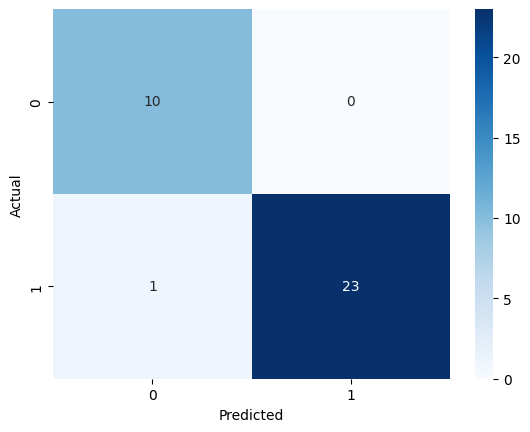

In [7]:
# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Visualizing Model Performance

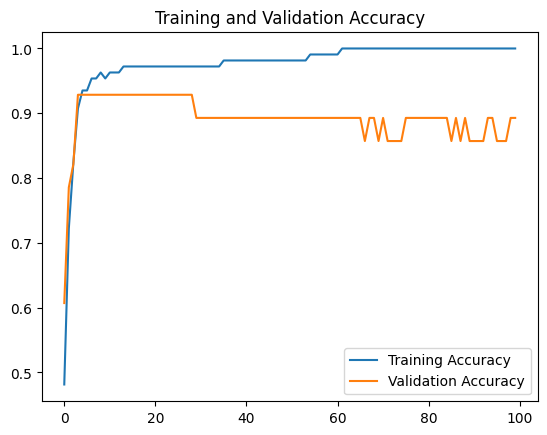

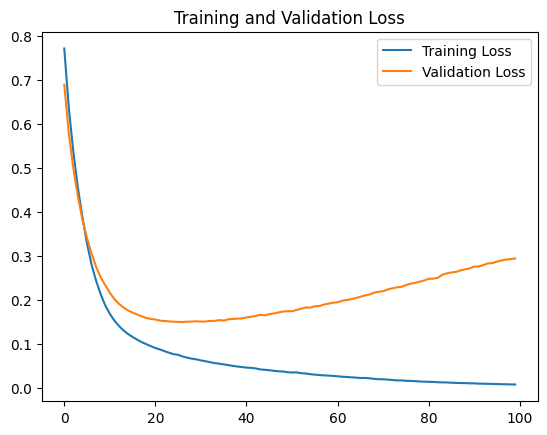

In [8]:
# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [9]:
# Baseline model with one hidden layer
model_baseline = Sequential()
model_baseline.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model_baseline.add(Dense(1, activation='sigmoid'))

# Compile the model
model_baseline.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_baseline = model_baseline.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5186 - loss: 0.8005 - val_accuracy: 0.5714 - val_loss: 0.7060
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5773 - loss: 0.7191 - val_accuracy: 0.6071 - val_loss: 0.6362
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6437 - loss: 0.6506 - val_accuracy: 0.6786 - val_loss: 0.5770
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7745 - loss: 0.5523 - val_accuracy: 0.7143 - val_loss: 0.5263
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7933 - loss: 0.5009 - val_accuracy: 0.7857 - val_loss: 0.4839
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8060 - loss: 0.4486 - val_accuracy: 0.7857 - val_loss: 0.4487
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8851 - loss: 0.4094 - val_accuracy: 0.7857 - val_loss: 0.4204
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9199 - loss: 0.3797 - val_accuracy: 0.8214 - val_loss: 0.3939
E

#Deeper Model with More Hidden Layers

In [12]:
# Deeper model with more hidden layers
model_deep = Sequential()
model_deep.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_deep.add(Dense(32, activation='relu'))
model_deep.add(Dense(16, activation='relu'))
model_deep.add(Dense(1, activation='sigmoid'))

# Compile the model
model_deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_deep = model_deep.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7068 - loss: 0.6165 - val_accuracy: 0.8214 - val_loss: 0.4580
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8911 - loss: 0.4468 - val_accuracy: 0.8571 - val_loss: 0.3463
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9561 - loss: 0.2922 - val_accuracy: 0.8571 - val_loss: 0.2703
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9549 - loss: 0.2214 - val_accuracy: 0.8929 - val_loss: 0.2204
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9573 - loss: 0.1744 - val_accuracy: 0.8929 - val_loss: 0.1925
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9803 - loss: 0.1036 - val_accuracy: 0.9286 - val_loss: 0.1721
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9783 - loss: 0.0946 - val_accuracy: 0.9286 - val_loss: 0.1585
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9871 - loss: 0.0848 - val_accuracy: 0.9286 

#Model with Dropout Layers to Avoid Overfitting

In [11]:
from tensorflow.keras.layers import Dropout

# Model with Dropout
model_dropout = Sequential()
model_dropout.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_dropout.add(Dropout(0.5))  # Dropout to prevent overfitting
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(16, activation='relu'))
model_dropout.add(Dense(1, activation='sigmoid'))

# Compile the model
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.3775 - loss: 0.8080 - val_accuracy: 0.6071 - val_loss: 0.6550
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5344 - loss: 0.7367 - val_accuracy: 0.7857 - val_loss: 0.6007
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6609 - loss: 0.7081 - val_accuracy: 0.7857 - val_loss: 0.5589
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8077 - loss: 0.5410 - val_accuracy: 0.8571 - val_loss: 0.5127
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7202 - loss: 0.6092 - val_accuracy: 0.8929 - val_loss: 0.4697
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8342 - loss: 0.5035 - val_accuracy: 0.8929 - val_loss: 0.4278
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8508 - loss: 0.4470 - val_accuracy: 0.8929 - val_loss: 0.3863
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9103 - loss: 0.3852 - val_accuracy: 0.

#Model with Different Optimizer (RMSprop or SGD)

In [13]:
# Model with RMSprop optimizer
model_rmsprop = Sequential()
model_rmsprop.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_rmsprop.add(Dense(32, activation='relu'))
model_rmsprop.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer
model_rmsprop.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the model
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5739 - loss: 0.7023 - val_accuracy: 0.8571 - val_loss: 0.5015
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9117 - loss: 0.4547 - val_accuracy: 0.8571 - val_loss: 0.3924
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9049 - loss: 0.3475 - val_accuracy: 0.9286 - val_loss: 0.3175
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9259 - loss: 0.2666 - val_accuracy: 0.9286 - val_loss: 0.2662
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9140 - loss: 0.2385 - val_accuracy: 0.9286 - val_loss: 0.2326
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9494 - loss: 0.1888 - val_accuracy: 0.9286 - val_loss: 0.2089
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9665 - loss: 0.1519 - val_accuracy: 0.9286 - val_loss: 0.1915
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9481 - loss: 0.1528 - val_accuracy: 0.9286 - 

#Model with Regularization (L2 or L1)
Adding L2 regularization to the layers to control overfitting by penalizing large weights.

In [14]:
from tensorflow.keras import regularizers

# Model with L2 Regularization
model_regularized = Sequential()
model_regularized.add(Dense(64, input_dim=X_train.shape[1], activation='relu',
                            kernel_regularizer=regularizers.l2(0.01)))
model_regularized.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_regularized.add(Dense(1, activation='sigmoid'))

# Compile the model
model_regularized.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_regularized = model_regularized.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7111 - loss: 1.3022 - val_accuracy: 0.7857 - val_loss: 1.1844
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9044 - loss: 1.1234 - val_accuracy: 0.8571 - val_loss: 1.0517
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9571 - loss: 0.9744 - val_accuracy: 0.8571 - val_loss: 0.9608
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9064 - loss: 0.9208 - val_accuracy: 0.8929 - val_loss: 0.8952
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9576 - loss: 0.8119 - val_accuracy: 0.8929 - val_loss: 0.8426
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9348 - loss: 0.7760 - val_accuracy: 0.8929 - val_loss: 0.7989
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9563 - loss: 0.7245 - val_accuracy: 0.9286 - val_loss: 0.7612
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9793 - loss: 0.6712 - val_accuracy: 0.9286 -

#Evaluating and Comparing All Models
Once you have trained all the models, you can evaluate their performance on the test data and compare them using accuracy scores, confusion matrices, and other metrics.

In [15]:
# Evaluate the baseline model
y_pred_baseline = model_baseline.predict(X_test)
y_pred_baseline = np.round(y_pred_baseline).astype(int)
print(f"Baseline Model Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(classification_report(y_test, y_pred_baseline))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Baseline Model Accuracy: 0.9412
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.96      0.96      0.96        24

    accuracy                           0.94        34
   macro avg       0.93      0.93      0.93        34
weighted avg       0.94      0.94      0.94        34



In [16]:
# Evaluate the deep model
y_pred_deep = model_deep.predict(X_test)
y_pred_deep = np.round(y_pred_deep).astype(int)
print(f"Deep Model Accuracy: {accuracy_score(y_test, y_pred_deep):.4f}")
print(classification_report(y_test, y_pred_deep))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Deep Model Accuracy: 0.9118
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.92      0.94        24

    accuracy                           0.91        34
   macro avg       0.89      0.91      0.90        34
weighted avg       0.92      0.91      0.91        34



In [17]:
# Evaluate the dropout model
y_pred_dropout = model_dropout.predict(X_test)
y_pred_dropout = np.round(y_pred_dropout).astype(int)
print(f"Dropout Model Accuracy: {accuracy_score(y_test, y_pred_dropout):.4f}")
print(classification_report(y_test, y_pred_dropout))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Dropout Model Accuracy: 0.9412
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.92      0.96        24

    accuracy                           0.94        34
   macro avg       0.92      0.96      0.93        34
weighted avg       0.95      0.94      0.94        34



In [18]:
# Evaluate the RMSprop model
y_pred_rmsprop = model_rmsprop.predict(X_test)
y_pred_rmsprop = np.round(y_pred_rmsprop).astype(int)
print(f"RMSprop Model Accuracy: {accuracy_score(y_test, y_pred_rmsprop):.4f}")
print(classification_report(y_test, y_pred_rmsprop))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
RMSprop Model Accuracy: 0.9118
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.92      0.94        24

    accuracy                           0.91        34
   macro avg       0.89      0.91      0.90        34
weighted avg       0.92      0.91      0.91        34



In [19]:
# Evaluate the regularized model
y_pred_regularized = model_regularized.predict(X_test)
y_pred_regularized = np.round(y_pred_regularized).astype(int)
print(f"Regularized Model Accuracy: {accuracy_score(y_test, y_pred_regularized):.4f}")
print(classification_report(y_test, y_pred_regularized))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Regularized Model Accuracy: 0.9118
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.88      0.93        24

    accuracy                           0.91        34
   macro avg       0.88      0.94      0.90        34
weighted avg       0.93      0.91      0.91        34



#Plotting and Visualizing Model Performance

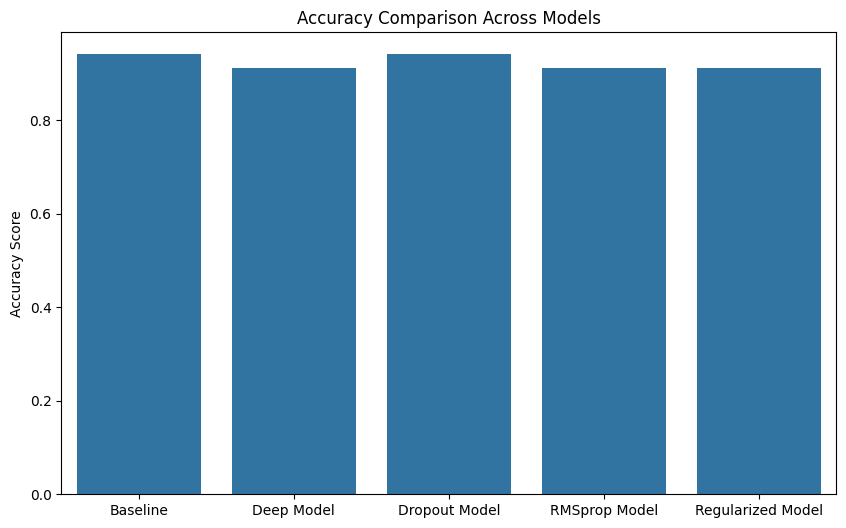

In [20]:
# Collect accuracy scores
accuracy_scores = [
    accuracy_score(y_test, y_pred_baseline),
    accuracy_score(y_test, y_pred_deep),
    accuracy_score(y_test, y_pred_dropout),
    accuracy_score(y_test, y_pred_rmsprop),
    accuracy_score(y_test, y_pred_regularized)
]

# Model names for reference
model_names = ['Baseline', 'Deep Model', 'Dropout Model', 'RMSprop Model', 'Regularized Model']

# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores)
plt.title('Accuracy Comparison Across Models')
plt.ylabel('Accuracy Score')
plt.show()